## Business Case:-
* Waste management remains a persistent and critical issue across the globe, with increasing urbanization and consumerism contributing to the generation of massive amounts of mixed waste. Traditional methods of manual garbage segregation are labor-intensive, inefficient, and pose health risks to workers. Moreover, improper sorting of waste materials significantly hampers recycling processes and increases environmental pollution. To address these challenges, we propose an AI-powered Garbage Image Classification system that uses deep learning to automatically identify and categorize different types of waste such as plastic, glass, metal, cardboard, paper, and trash. This solution enables real-time waste classification by simply analyzing images captured from mobile devices, surveillance cameras, or smart bins. By integrating this technology into waste collection systems or public recycling initiatives, municipalities and private sectors can streamline waste segregation, reduce operational costs, and improve recycling efficiency. The model, trained on diverse garbage images, is highly accurate and easily deployable via web or mobile applications, making it a scalable and impactful solution for smart cities, recycling plants, environmental startups, and educational campaigns focused on sustainability. Ultimately, this system empowers organizations to adopt cleaner, smarter, and safer waste management practices using AI.

#### Domain name :- Environmental AI / Green AI

In [1]:
import keras
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
batch_size = 60
seed = 1
epochs = 40

In [3]:
data_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r"D:\Data Scientist\Data Science\Data Science Internship Project\Intership Extra Projects\Garbage Classification System\Images",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed=seed
)

Found 2527 files belonging to 6 classes.


In [4]:
class_name = data_ds.class_names
print("Class Name:-", class_name)

Class Name:- ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [5]:
def show_images(images,labels):
    fig,axies = plt.subplots(10,6, figsize=(10,10))
    axies = axies.flatten()
    for i, (img, label) in enumerate(zip(images,labels)):
        axies[i].imshow(img.numpy().astype("uint8"))
        axies[i].set_title(f"label: {label}")
        axies[i].axis("off")
    plt.tight_layout()
    plt.show()

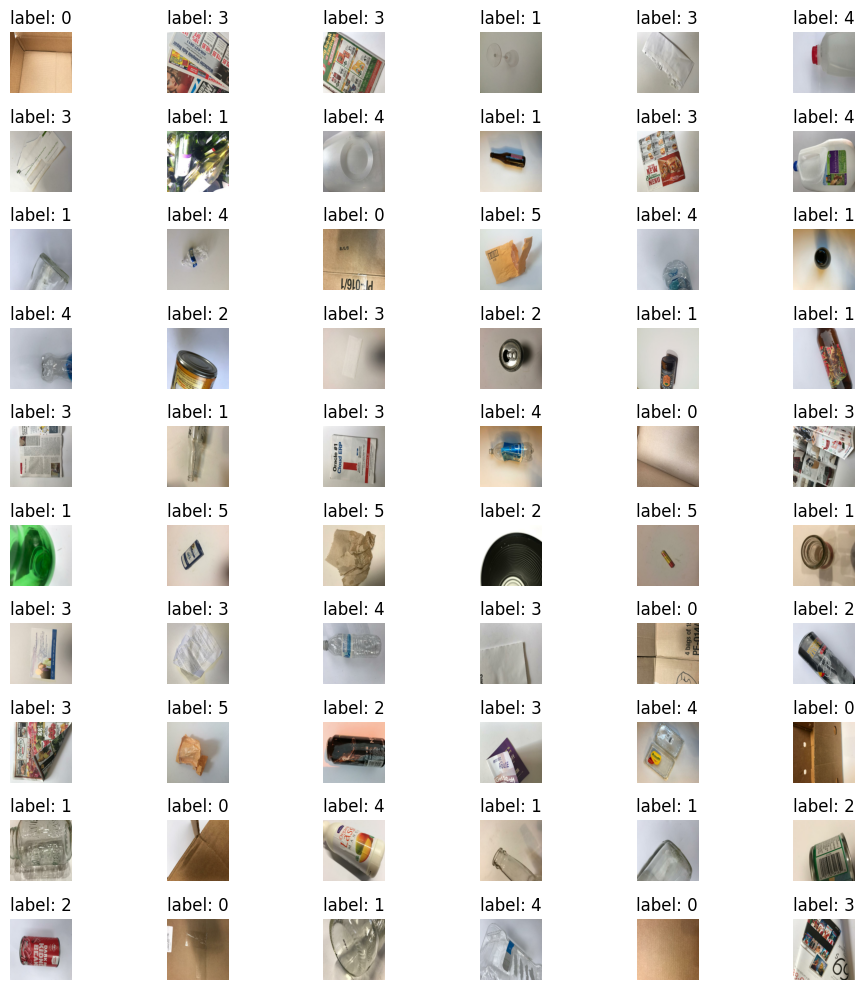

In [6]:
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images,labels = batch

images,labels = next(iter(batched_ds))
show_images(images,labels)

In [7]:
x = []
y = []
for images,labels in data_ds.batch(1500):
    for img,label in zip(images,labels):
        x.append(img)
        y.append(label.numpy())

In [8]:
print(images.shape)

(1027, 224, 224, 3)


In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
(x_train,x_test) = x[:1900],x[1900:]
(y_train,y_test) = y[:1900],y[1900:]

In [11]:
print(x_train.shape)

(1900, 224, 224, 3)


In [12]:
print(x_test.shape)

(627, 224, 224, 3)


In [13]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [14]:
print(len(class_name))

6


In [15]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes = len(class_name))
y_test = to_categorical(y_test,num_classes = len(class_name))

In [16]:
print(x_train.shape[0])
print(x_test.shape[0])

1900
627


In [17]:
print(y_train.shape[0])
print(y_test.shape[0])

1900
627


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, 3, padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(250, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(6, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 250)                 │       3,136,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,559,314 (13.58 MB)

 Trainable params: 3,559,314 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
from keras.callbacks import ModelCheckpoint

checkpopinter = ModelCheckpoint(filepath="Garbage.keras", verbose=1, save_best_only=True)

hist = model.fit(
    x_train,
    y_train,
    batch_size=60,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[checkpopinter],  # No quotes here!
    verbose=1
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.2133 - loss: 1.7291
Epoch 1: val_loss improved from inf to 1.55816, saving model to Garbage.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 817ms/step - accuracy: 0.2143 - loss: 1.7275 - val_accuracy: 0.3365 - val_loss: 1.5582
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.3908 - loss: 1.4895
Epoch 2: val_loss improved from 1.55816 to 1.45475, saving model to Garbage.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 829ms/step - accuracy: 0.3915 - loss: 1.4881 - val_accuracy: 0.3923 - val_loss: 1.4547
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.4298 - loss: 1.3558
Epoch 3: val_loss improved from 1.45475 to 1.27025, saving model to Garbage.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 811ms/step - accuracy: 0.4303 - loss: 1.3550 - val_accuracy: 0.4833 - val_loss: 1.2702
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5109 - loss: 1.2117
Epoch 4: val_loss did not improve from 1.27025
32/32 ━━━━━━━

In [32]:
y_hat = model.predict(x_test)

predict_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


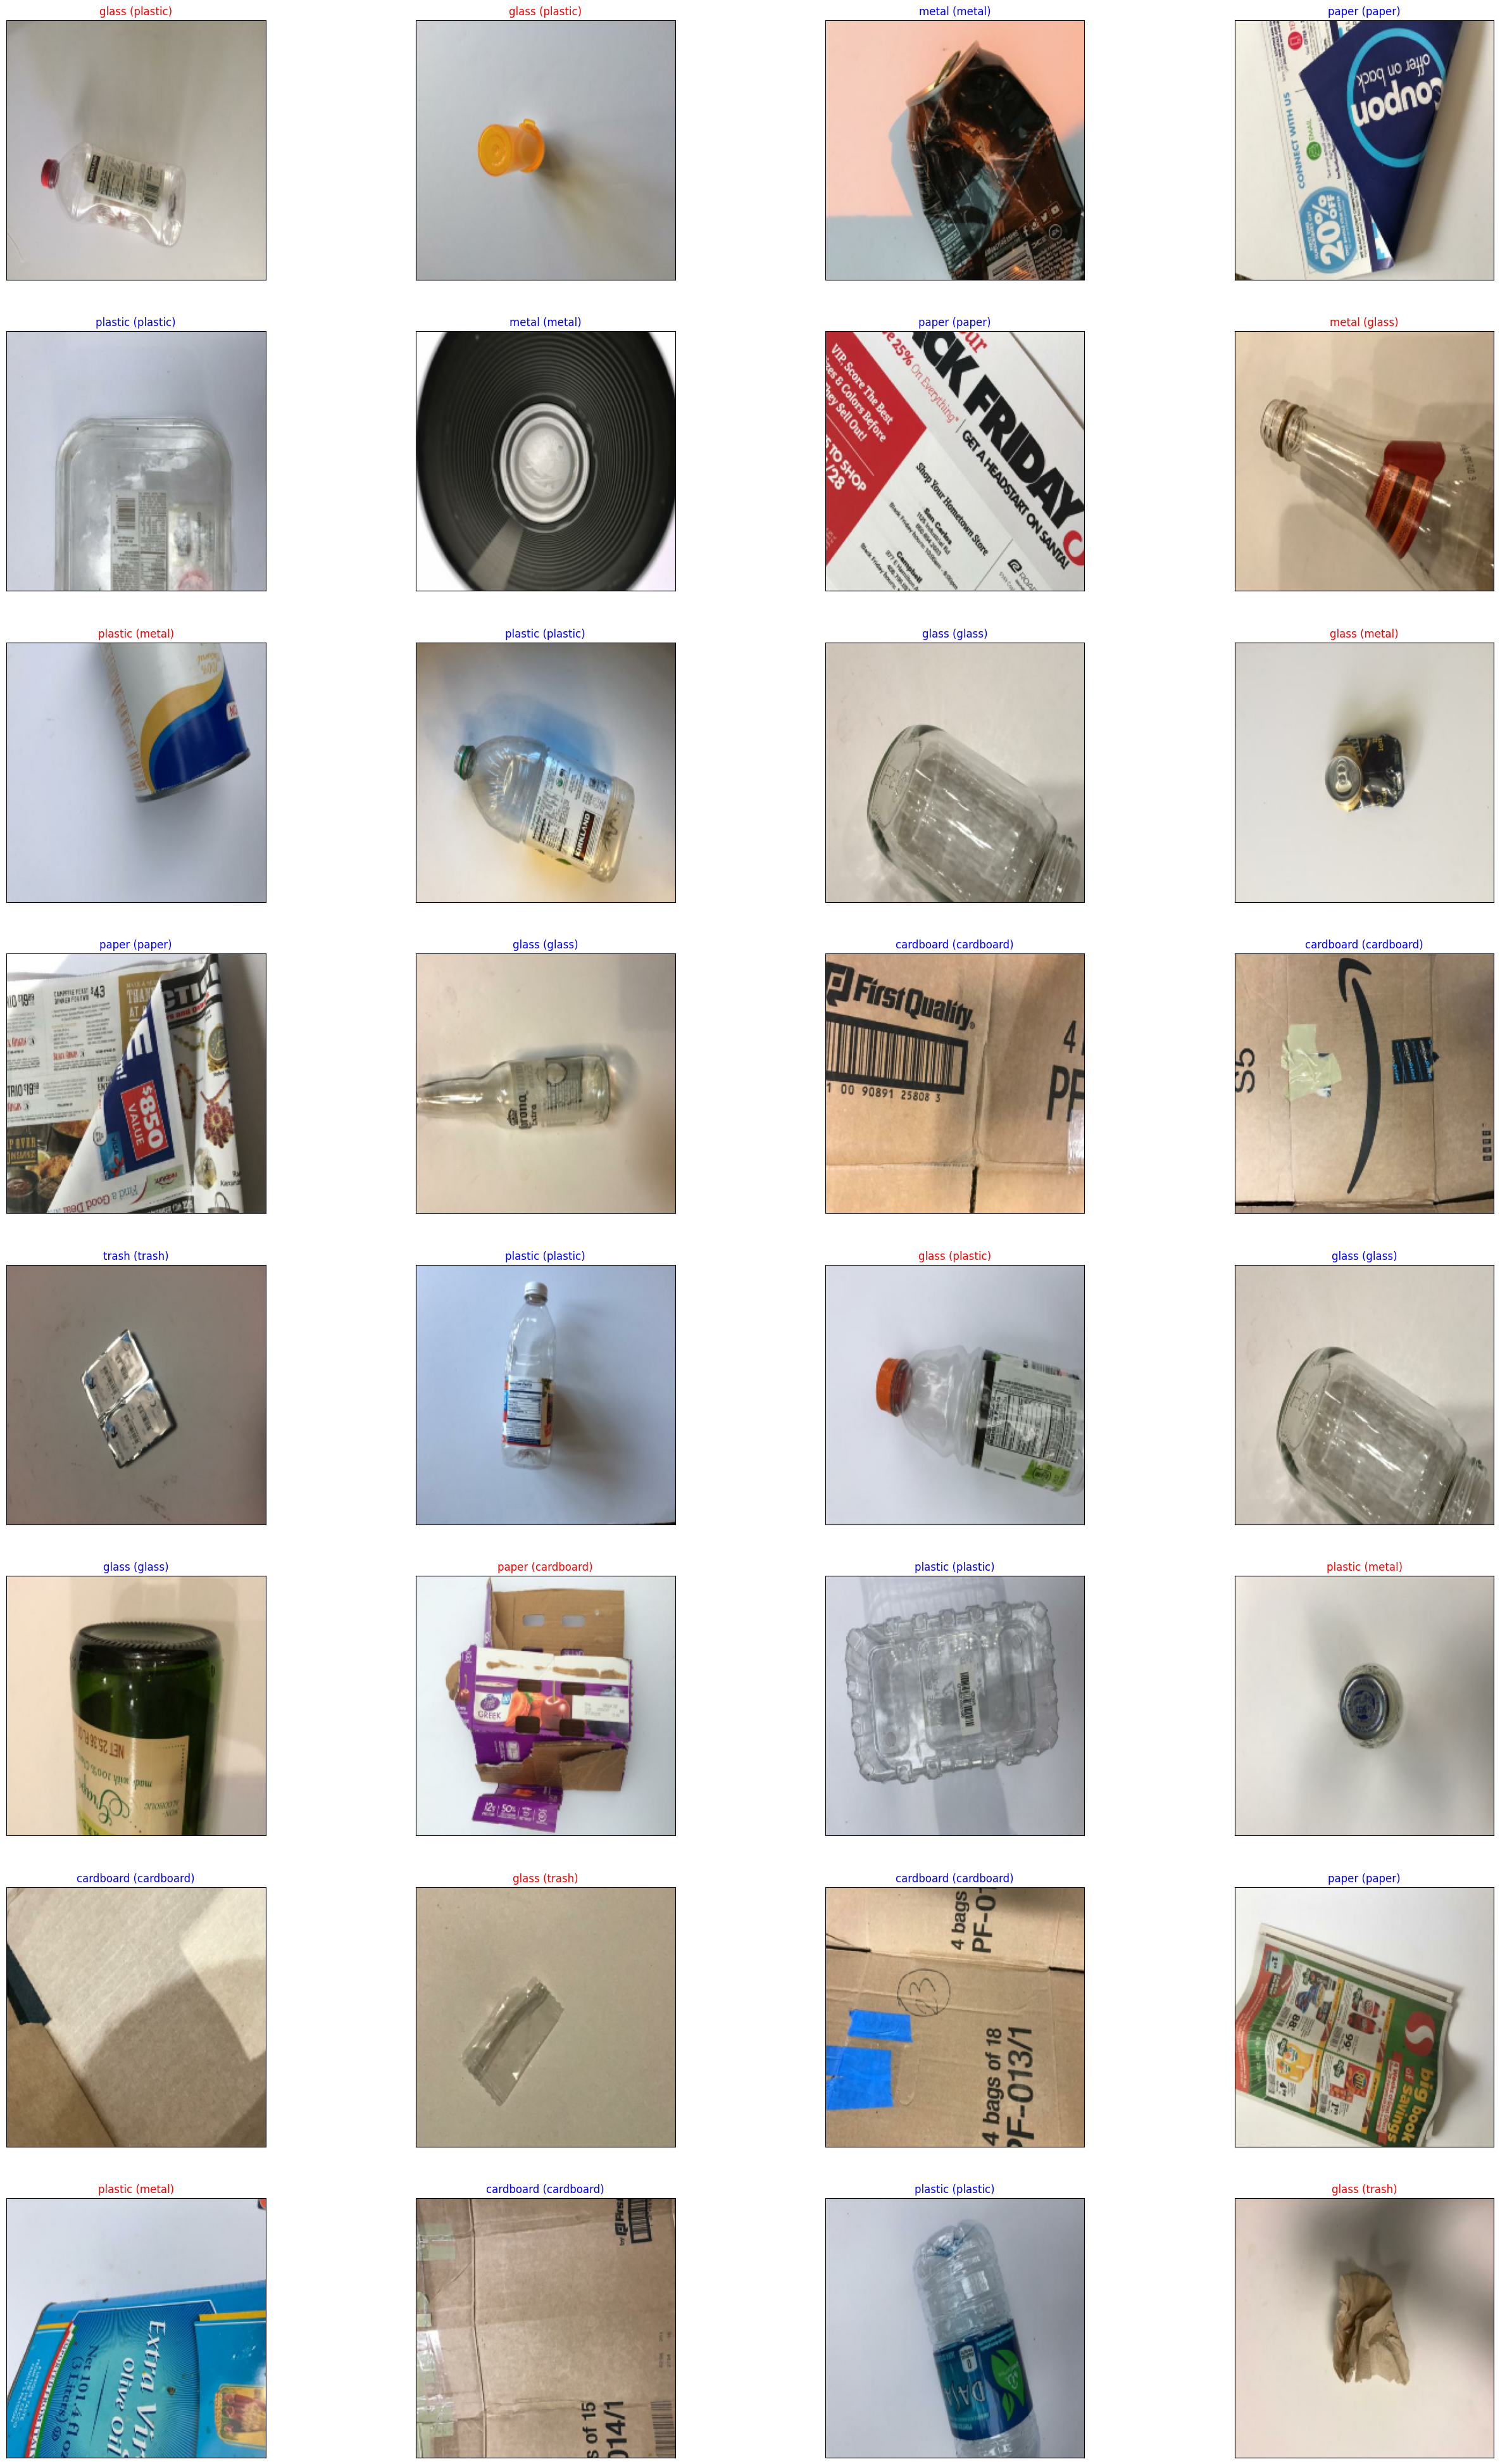

In [35]:
fig = plt.figure(figsize=(32,50))
for i,idx in enumerate(np.random.choice(x_test.shape[0],size=32,replace = True)):
    ax = fig.add_subplot(8,4,i + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(predict_class[pred_idx],predict_class[true_idx]), color=("blue" if pred_idx == true_idx else "red"))

In [39]:
from sklearn.metrics import *

In [41]:
score = model.evaluate(x_test,y_test,verbose=0)
accuracy = 100*score[1]

print(accuracy)

62.36044764518738


<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Thank You
</div>